In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Bank Marketing.csv')
data.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


From the first 5 records we can clearly see which columns are categorical and which ones are numeric

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

There are no missing values in the dataset.

In [11]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f'{col}:\n{data[col].value_counts()}\n')

Job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

Marital Status:
married     27214
single      12790
divorced     5207
Name: Marital Status, dtype: int64

Education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: Education, dtype: int64

Credit:
no     44396
yes      815
Name: Credit, dtype: int64

Housing Loan:
yes    25130
no     20081
Name: Housing Loan, dtype: int64

Personal Loan:
no     37967
yes     7244
Name: Personal Loan, dtype: int64

Contact:
cellular     29285
unknown      13020
telephone     2906
Name: Contact, dtype: int64

Last Contact Month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214

Categorical features do not contain many categorical features

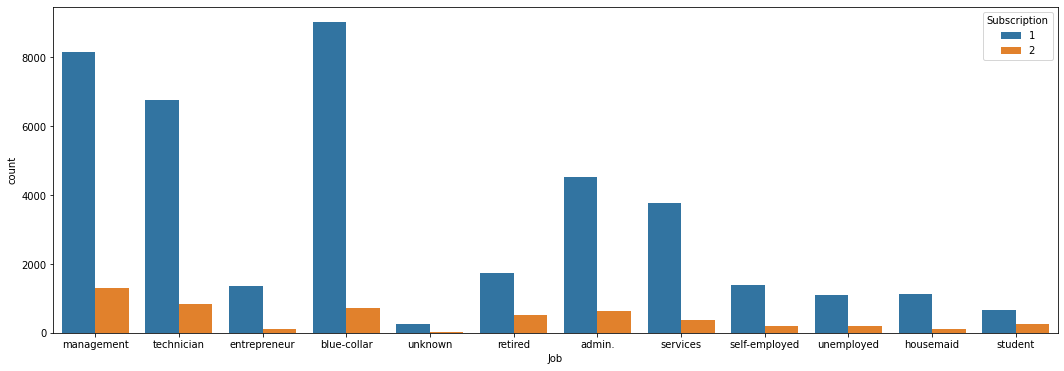

13.76% subscribed for management category.
11.06% subscribed for technician category.
8.27% subscribed for entrepreneur category.
7.27% subscribed for blue-collar category.
11.81% subscribed for unknown category.
22.79% subscribed for retired category.
12.20% subscribed for admin. category.
8.88% subscribed for services category.
11.84% subscribed for self-employed category.
15.50% subscribed for unemployed category.
8.79% subscribed for housemaid category.
28.68% subscribed for student category.


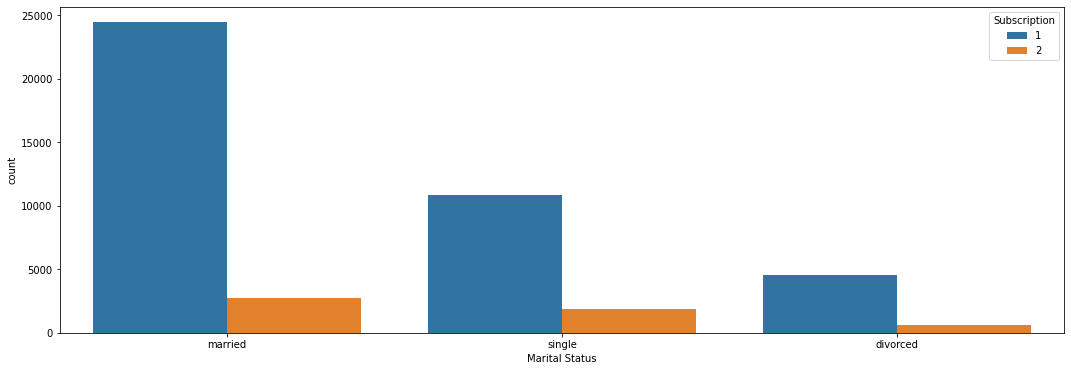

10.12% subscribed for married category.
14.95% subscribed for single category.
11.95% subscribed for divorced category.


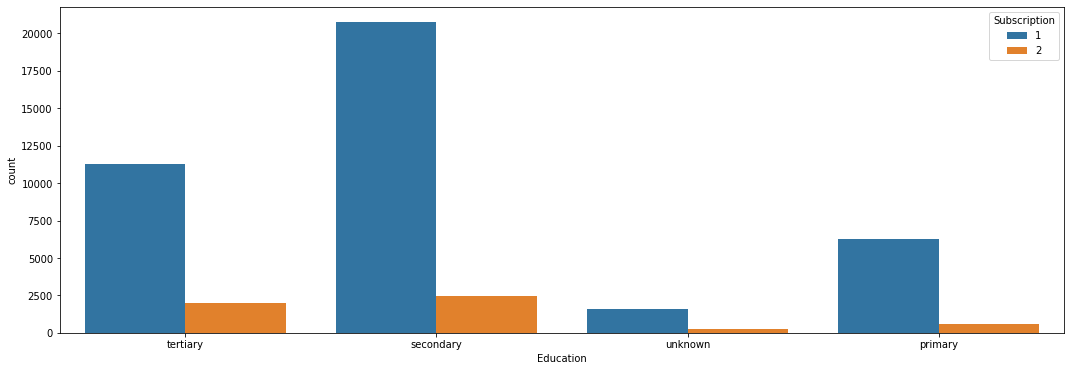

15.01% subscribed for tertiary category.
10.56% subscribed for secondary category.
13.57% subscribed for unknown category.
8.63% subscribed for primary category.


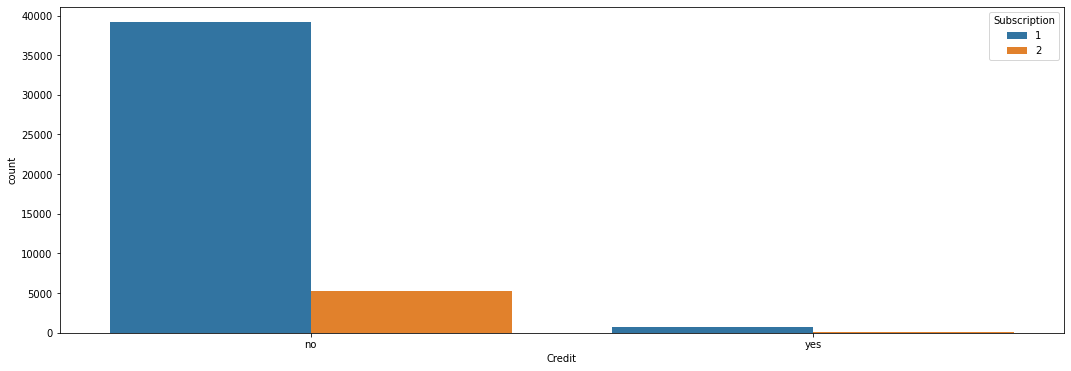

11.80% subscribed for no category.
6.38% subscribed for yes category.


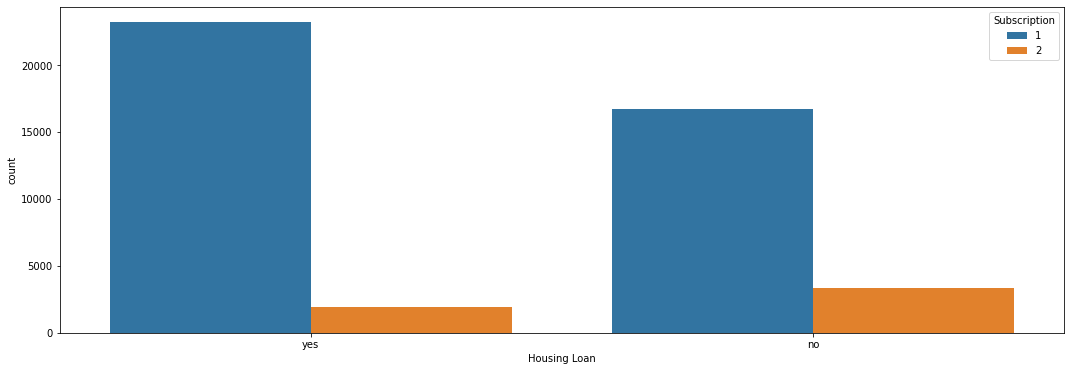

7.70% subscribed for yes category.
16.70% subscribed for no category.


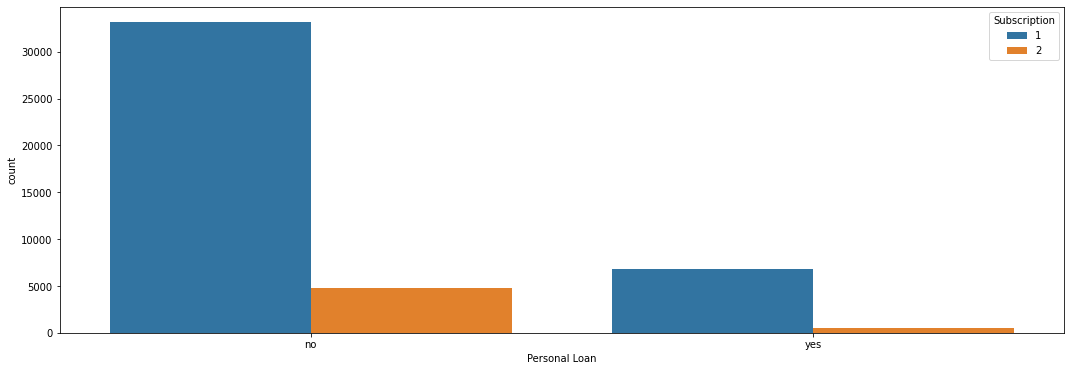

12.66% subscribed for no category.
6.68% subscribed for yes category.


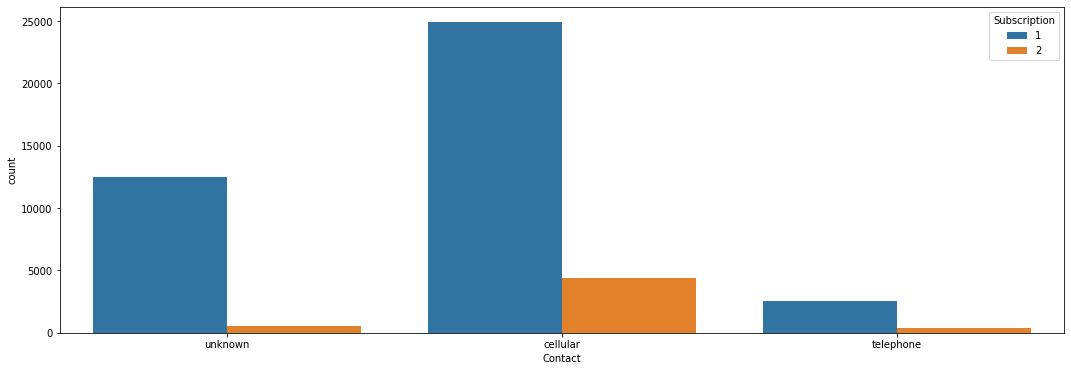

4.07% subscribed for unknown category.
14.92% subscribed for cellular category.
13.42% subscribed for telephone category.


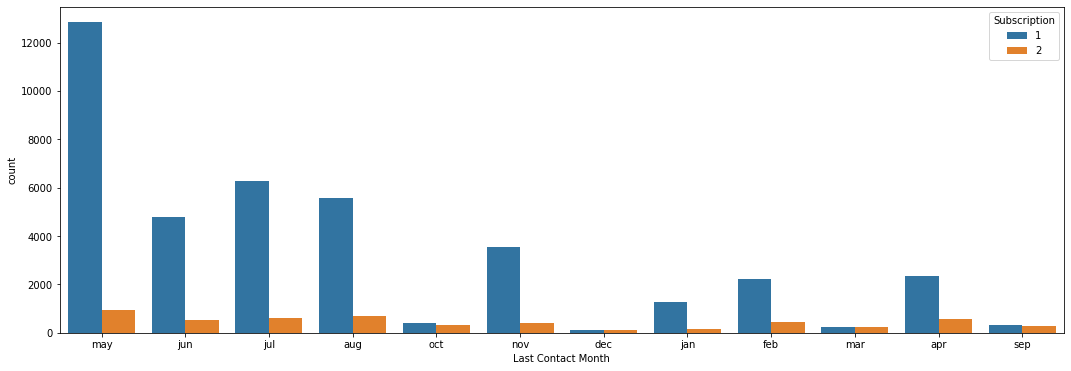

6.72% subscribed for may category.
10.22% subscribed for jun category.
9.09% subscribed for jul category.
11.01% subscribed for aug category.
43.77% subscribed for oct category.
10.15% subscribed for nov category.
46.73% subscribed for dec category.
10.12% subscribed for jan category.
16.65% subscribed for feb category.
51.99% subscribed for mar category.
19.68% subscribed for apr category.
46.46% subscribed for sep category.


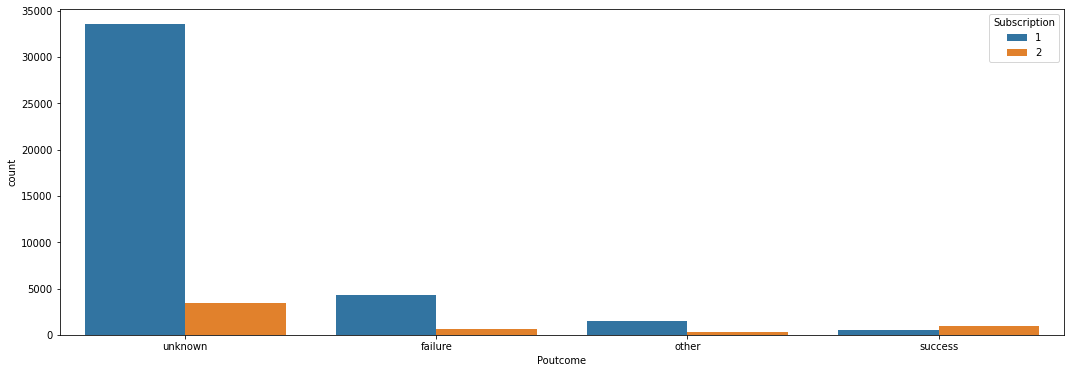

9.16% subscribed for unknown category.
12.61% subscribed for failure category.
16.68% subscribed for other category.
64.73% subscribed for success category.


In [27]:
cat_cols = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']
num_cols = ['Age', 'Balance (euros)', 'Last Contact Day', 'Last Contact Duration', 'Campaign', 'Pdays', 'Previous']
for cat_col in cat_cols:
    plt.figure(figsize=(18, 6))
    sns.countplot(data=data, x=cat_col, hue='Subscription')
    plt.show()
    for category in data[cat_col].unique():
        total = data[data[cat_col] == category].shape[0]
        subscribed = data[(data[cat_col] == category) & (data['Subscription'] == 2)].shape[0]
        print(f'{(subscribed/total)*100:.2f}% subscribed for {category} category.')

We can see the percentage of subscription among different marital status is roughly the same, hence we might consider dropping this column later because it doesn't seem to provide any valuable data.

In [48]:
data.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


Almost all columns contain outliers.

In [91]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
X = data.iloc[:, :-1]
y = data.iloc[:, -1].replace({1 : 0, 2 : 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [92]:
ct = ColumnTransformer(transformers=[('ordinal_encoder', OrdinalEncoder(), cat_cols)], remainder='passthrough')
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_train_copy = ct.fit_transform(X_train_copy)
X_train_copy = pd.DataFrame(X_train_copy, columns=X_train.columns)
mut_info = mutual_info_classif(X_train_copy, y_train_copy, discrete_features=[1, 2, 3, 4, 6, 7, 8, 15])
sorted(list(zip(X_train_copy.columns, mut_info)), key=lambda x: x[1], reverse=True)

[('Campaign', 0.0706959255571118),
 ('Contact', 0.029138590099224038),
 ('Previous', 0.02726947719238959),
 ('Personal Loan', 0.024086977485014247),
 ('Last Contact Month', 0.02167526371509121),
 ('Housing Loan', 0.013603409254607055),
 ('Poutcome', 0.01296696857456746),
 ('Age', 0.012922310714563068),
 ('Last Contact Day', 0.010592999993035424),
 ('Credit', 0.009327798182402688),
 ('Last Contact Duration', 0.0039155242112351996),
 ('Balance (euros)', 0.003688678243010779),
 ('Pdays', 0.0029658253029982706),
 ('Marital Status', 0.002656982410439244),
 ('Job', 0.001995412346137135),
 ('Education', 0.00026272439547190326)]

The following list contains the information about the target variable obtained from specific columns. I'll keep only those with the information > 0.01

In [93]:
selected_cols = ['Campaign', 'Contact', 'Previous', 'Personal Loan', 'Last Contact Month', 'Housing Loan', 'Last Contact Day', 'Poutcome']
X_train[selected_cols]

,Campaign,Contact,Previous,Personal Loan,Last Contact Month,Housing Loan,Last Contact Day,Poutcome
32213,1,cellular,1,no,apr,yes,16,failure
36907,2,telephone,13,no,may,yes,12,success
1447,2,unknown,0,no,may,yes,8,unknown
10973,3,unknown,0,yes,jun,no,17,unknown
26982,7,telephone,0,yes,nov,no,21,unknown
...,...,...,...,...,...,...,...,...
41949,1,telephone,0,no,oct,no,22,unknown
22019,3,cellular,0,no,aug,yes,20,unknown
643,1,unknown,0,no,may,yes,6,unknown
20094,2,cellular,0,no,aug,no,11,unknown


In [94]:
selected_cat_cols = ['Contact', 'Personal Loan', 'Last Contact Month', 'Housing Loan', 'Poutcome']
selected_num_cols = ['Campaign', 'Previous', 'Last Contact Day']

num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

transformer = ColumnTransformer(transformers=[('num', num_transformer, selected_num_cols),
                                              ('cat', cat_transformer, selected_cat_cols)])

X_train = transformer.fit_transform(X_train)

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : [100, 110, 120, 130, 140, 150],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=params,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.63 %
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 130}


In [97]:
clf = RandomForestClassifier(bootstrap=True, criterion='gini', n_estimators=130)
clf.fit(X_train, y_train)
X_test = transformer.transform(X_test)
clf.score(X_test, y_test)

0.884662169633971

Random Forest score

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential()
ann.add(Dense(6, activation='relu', input_shape=(26,)))
ann.add(Dense(6, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=15, batch_size=100)

Epoch 1/15
362/362 [==============================] - 2s 4ms/step - loss: 0.4404 - accuracy: 0.8163
Epoch 2/15
362/362 [==============================] - 1s 4ms/step - loss: 0.3211 - accuracy: 0.8830
Epoch 3/15
362/362 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.8848
Epoch 4/15
362/362 [==============================] - 1s 4ms/step - loss: 0.3024 - accuracy: 0.8906
Epoch 5/15
362/362 [==============================] - 1s 4ms/step - loss: 0.2990 - accuracy: 0.8923
Epoch 6/15
362/362 [==============================] - 2s 4ms/step - loss: 0.2969 - accuracy: 0.8928
Epoch 7/15
362/362 [==============================] - 2s 5ms/step - loss: 0.2956 - accuracy: 0.8927
Epoch 8/15
362/362 [==============================] - 1s 4ms/step - loss: 0.2945 - accuracy: 0.8930: 0s - loss:
Epoch 9/15
362/362 [==============================] - 2s 5ms/step - loss: 0.2938 - accuracy: 0.8931
Epoch 10/15
362/362 [==============================] - 2s 4ms/step - loss: 0.2934 - accu

In [102]:
ann.evaluate(X_test, y_test)

283/283 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.8934: 0s - loss: 0.274


[0.2898712158203125, 0.8933982253074646]

ANN achieved a slightly better score